<a href="https://colab.research.google.com/github/upeshjeengar/stock-price-prediction/blob/main/Stock_Price_Prediction_with_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 

Time Series Forecasting means analyzing and modeling time-series data to make future decisions. Some of the applications of Time Series Forecasting are weather forecasting, sales forecasting, business forecasting, stock price forecasting, etc. The ARIMA model is a popular statistical technique used for Time Series Forecasting. If you want to learn Time Series Forecasting with ARIMA, this article is for you. In this article, I will take you through the task of Time Series Forecasting with ARIMA using the Python programming language.



## What is ARIMA?

ARIMA stands for Autoregressive Integrated Moving Average. It is an algorithm used for forecasting Time Series Data. ARIMA models have three parameters like ARIMA(p, d, q). Here p, d, and q are defined as:

1. p is the number of lagged values that need to be added or subtracted from the values (label column). It captures the autoregressive part of ARIMA.
2. d represents the number of times the data needs to differentiate to produce a stationary signal. If it’s stationary data, the value of d should be 0, and if it’s seasonal data, the value of d should be 1. d captures the integrated part of ARIMA.
3. q is the number of lagged values for the error term added or subtracted from the values (label column). It captures the moving average part of ARIMA.

I hope you have now understood the ARIMA model. In the section below, I will take you through the task of Time Series Forecasting of stock prices with ARIMA using the Python programming language.

## Time Series Forecasting with ARIMA

Now let’s start with the task of Time Series Forecasting with ARIMA. I will first collect Google stock price data using the Yahoo Finance API. If you have never used Yahoo Finance API, you can learn more about it here.

Now here’s how to collect data about the Google’s Stock Price:

In [12]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('HDFCBANK.NS',
                      start=start_date,
                      end=end_date,
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())

          Date         Open         High          Low        Close  \
238 2024-08-14  1606.500000  1613.699951  1603.199951  1607.800049   
239 2024-08-16  1628.500000  1634.150024  1611.000000  1632.099976   
240 2024-08-19  1637.650024  1637.650024  1623.699951  1631.550049   
241 2024-08-20  1627.449951  1646.000000  1627.449951  1637.699951   
242 2024-08-21  1628.099976  1634.550049  1617.800049  1625.800049   

       Adj Close    Volume  
238  1607.800049  16167214  
239  1632.099976  13924623  
240  1631.550049   9751082  
241  1637.699951  15567247  
242  1625.800049  23815452  


We only need the date and close prices columns for the rest of the task, so let’s select both the columns and move further:

In [13]:
data = data[["Date", "Close"]]
print(data.head())

        Date        Close
0 2023-08-23  1586.599976
1 2023-08-24  1579.300049
2 2023-08-25  1561.500000
3 2023-08-28  1577.750000
4 2023-08-29  1590.300049


Now let’s visualize the close prices of Google before moving forward:

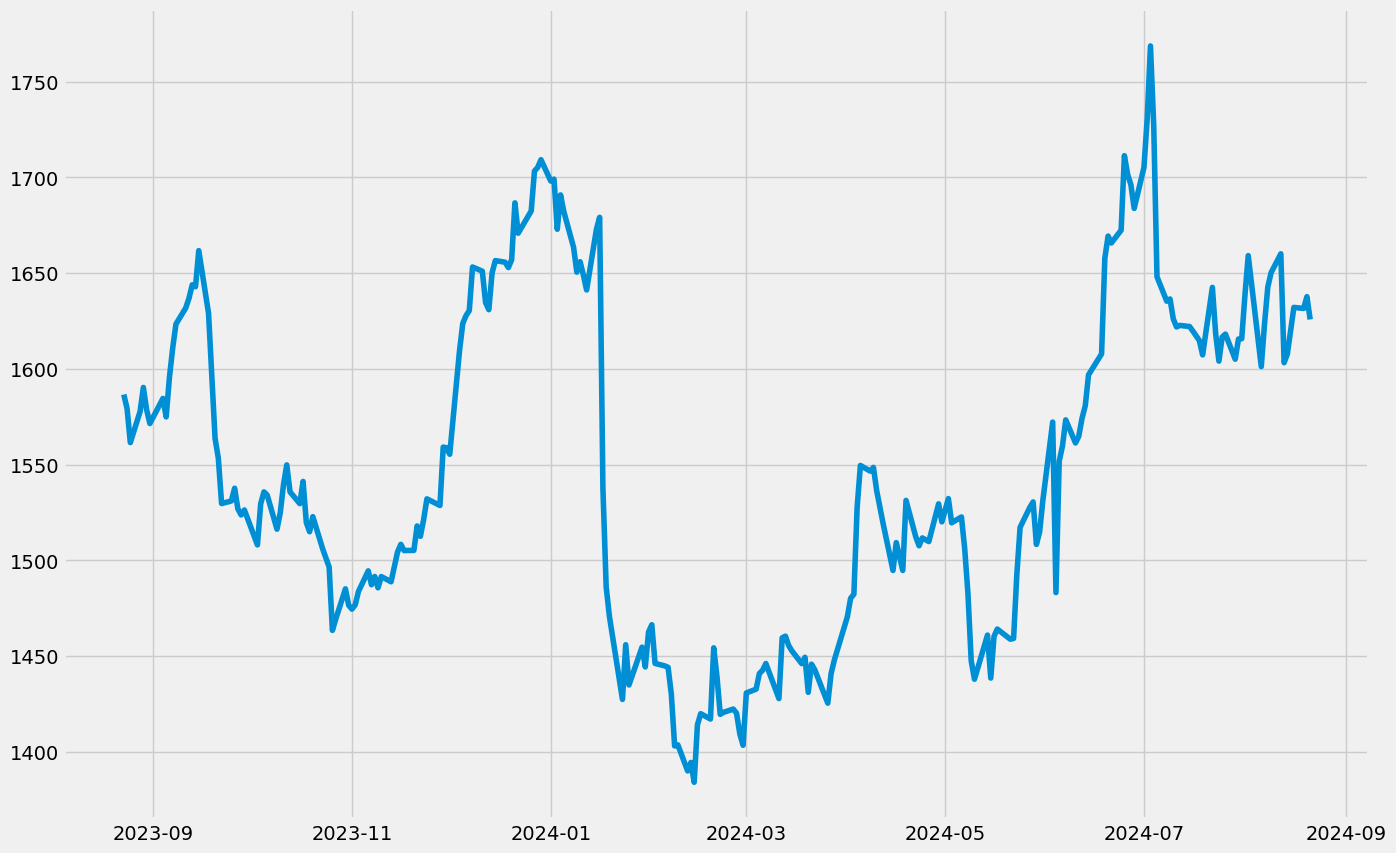

In [14]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Close"])

## Using ARIMA for Time Series Forecasting

Before using the ARIMA model, we have to figure out whether our data is stationary or seasonal. The data visualization graph about the closing stock prices above shows that our dataset is not stationary. To check whether our dataset is stationary or seasonal properly, we can use the seasonal decomposition method that splits the time series data into trend, seasonal, and residuals for a better understanding of the time series data:

<Figure size 640x480 with 0 Axes>

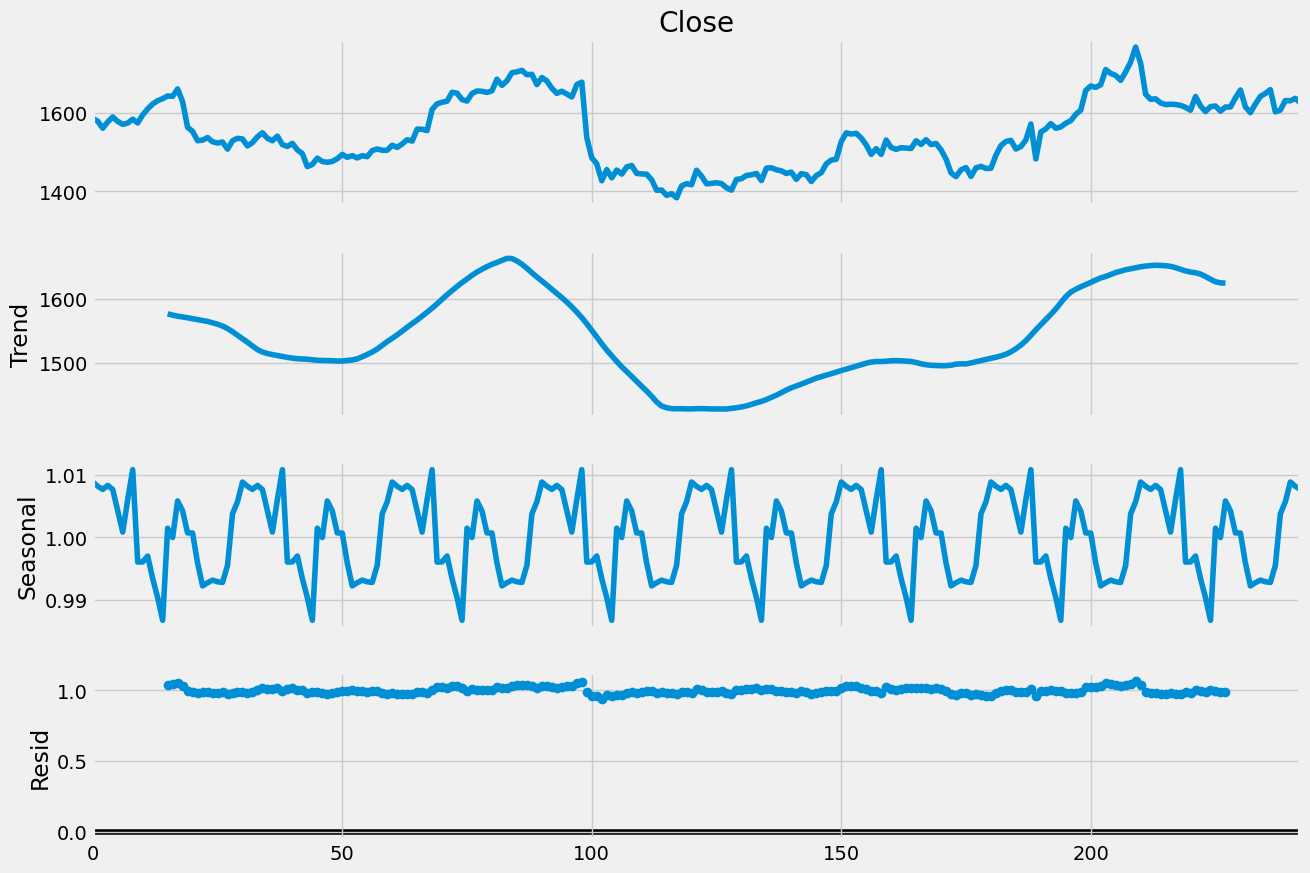

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"],
                            model='multiplicative', period = 30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)

So our data is not stationary it is seasonal. We need to use the Seasonal ARIMA (SARIMA) model for Time Series Forecasting on this data. But before using the SARIMA model, we will use the ARIMA model. It will help you learn using both models.

To use ARIMA or SARIMA, we need to find the p, d, and q values. We can find the value of p by plotting the autocorrelation of the Close column and the value of q by plotting the partial autocorrelation plot. The value of d is either 0 or 1. If the data is stationary, we should use 0, and if the data is seasonal, we should use 1. As our data is seasonal, we should use 1 as the d value.

Now here’s how to find the value of p:

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

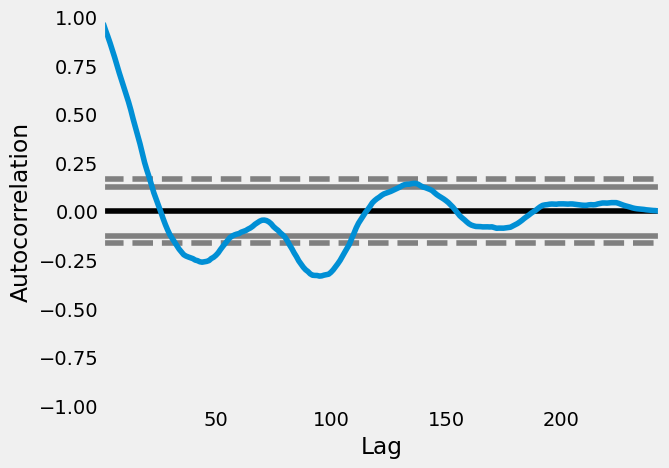

In [16]:
pd.plotting.autocorrelation_plot(data["Close"])

In the above autocorrelation plot, the curve is moving down after the 5th line of the first boundary. That is how to decide the p-value. Hence the value of p is 5. Now let’s find the value of q (moving average):

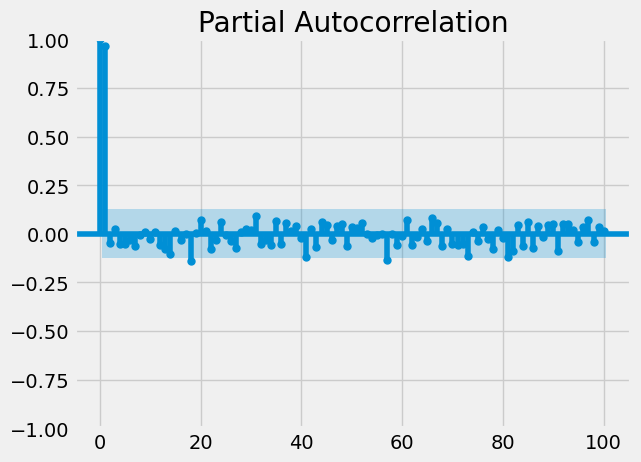

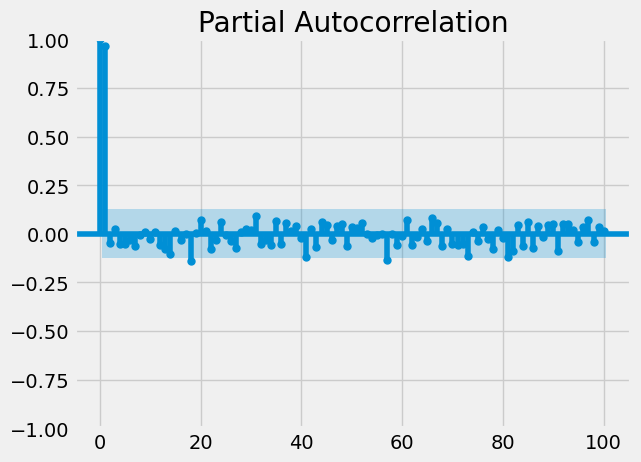

In [17]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)

In the above partial autocorrelation plot, we can see that only two points are far away from all the points. That is how to decide the q value. Hence the value of q is 2. Now let’s build an ARIMA model:

In [18]:
p, d, q = 5, 1, 2
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data["Close"], order=(p,d,q))
# Fit the model
fitted = model.fit()
# Set the display option
fitted.params['disp'] = -1
# Print the summary
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  243
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -1086.933
Date:                Thu, 22 Aug 2024   AIC                           2189.866
Time:                        14:31:16   BIC                           2217.778
Sample:                             0   HQIC                          2201.110
                                - 243                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0255     21.896     -0.001      0.999     -42.941      42.890
ar.L2          0.0478      8.617      0.006      0.996     -16.841      16.937
ar.L3          0.0230      0.984      0.023      0.9

Here’s how to predict the values using the ARIMA model:

In [19]:
predictions = fitted.predict()
print(predictions)

0         0.000000
1      1586.621481
2      1579.063262
3      1561.240512
4      1578.711593
          ...     
238    1602.641426
239    1610.891450
240    1631.768637
241    1628.391541
242    1637.783852
Name: predicted_mean, Length: 243, dtype: float64


The predicted values are wrong because the data is seasonal. ARIMA model will never perform well on seasonal time series data. So, here’s how to build a SARIMA model:

In [20]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  243
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -1048.162
Date:                            Thu, 22 Aug 2024   AIC                           2126.324
Time:                                    14:32:17   BIC                           2177.895
Sample:                                         0   HQIC                          2147.127
                                            - 243                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2426      6.089      0.040      0.968     -11.692      12.177
ar.L2          0.0788      0.945   

Now let’s predict the future stock prices using the SARIMA model for the next 10 days:



In [21]:
predictions = model.predict(len(data), len(data)+10)
print(predictions)

243    1607.141126
244    1603.697162
245    1606.107333
246    1610.818677
247    1620.313282
248    1622.690854
249    1622.228713
250    1623.586444
251    1633.925972
252    1634.036289
253    1639.091663
Name: predicted_mean, dtype: float64


Here’s how you can plot the predictions:



<Axes: >

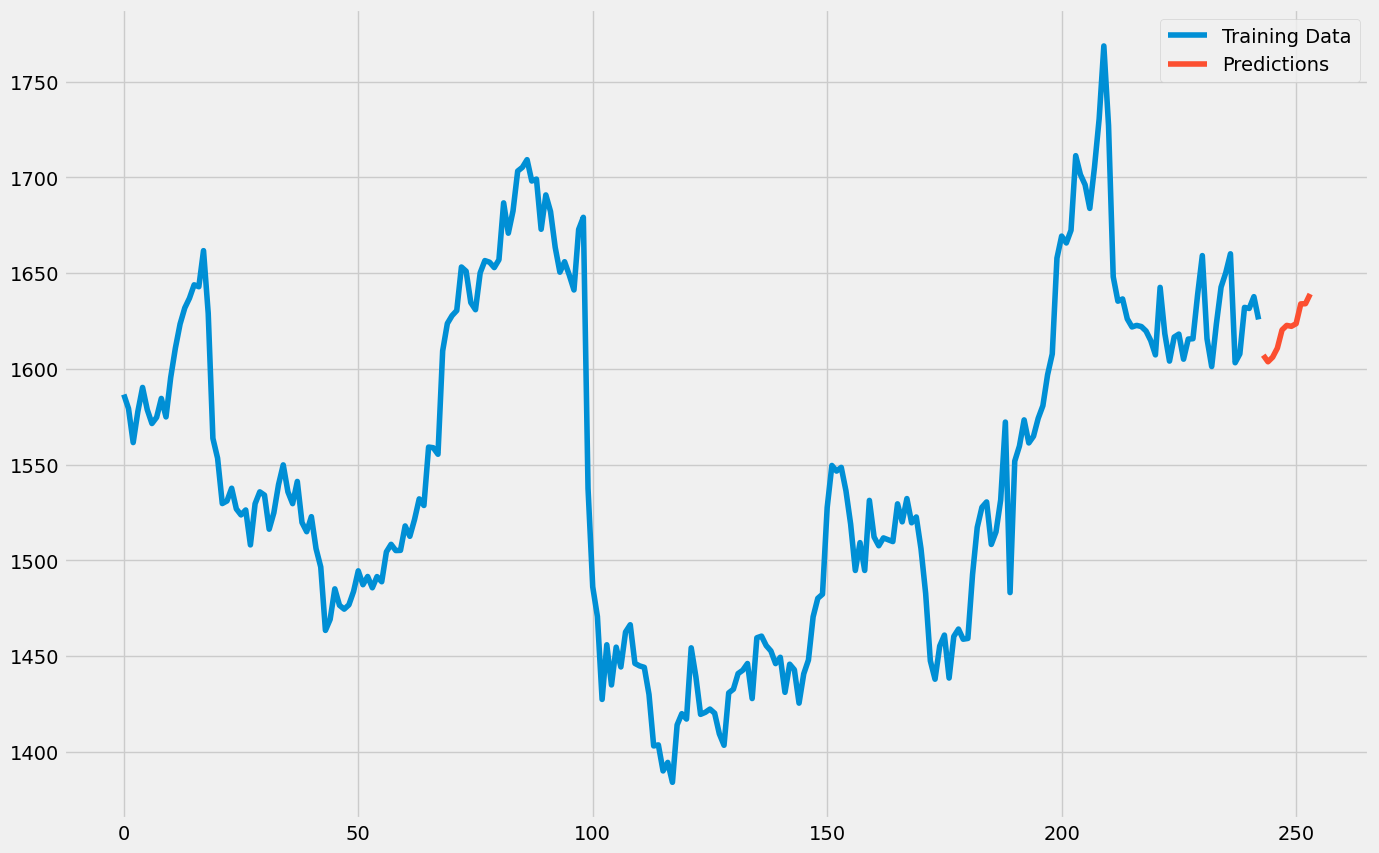

In [22]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")

So this is how we can use ARIMA or SARIMA models for Time Series Forecasting using Python.

## Summary
ARIMA stands for Autoregressive Integrated Moving Average. It is an algorithm used for forecasting Time Series Data. If the data is stationary, we need to use ARIMA, if the data is seasonal, we need to use Seasonal ARIMA (SARIMA). I hope you liked this article about Time Series Forecasting with ARIMA using Python. Feel free to ask valuable questions in the comments section below.